In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('cleaned_data_0.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26664 entries, 0 to 26663
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  int64 
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  in

In [4]:
Non_features = ['ID','default payment next month','SEX',
                'EDUCATION','MARRIAGE','BILL_AMT1','BILL_AMT2','BILL_AMT3',
                'BILL_AMT4','BILL_AMT5','BILL_AMT6','AGE']
X = df.drop(columns=Non_features).values
Y = df.iloc[:,24].values

In [5]:
from sklearn.preprocessing import RobustScaler
scale = RobustScaler(quantile_range=(15.0, 85.0))

X_scale = scale.fit_transform(X)
Y_scale = Y.ravel()

print(X_scale.shape,Y_scale.shape)

(26664, 13) (26664,)


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y_scale, test_size=0.2, random_state=42)

In [7]:
parameters = {
    'alpha': [1, 3, 10],
    'binarize': [0.0, None],
    'fit_prior': [True, False]
}

In [9]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report
clf = BernoulliNB()
clf = GridSearchCV(clf, param_grid=parameters, scoring='recall', n_jobs = -1, cv = 5)
clf = clf.fit(X_train,Y_train)
print('The best Naive Bayes model:\n', clf.best_params_)

The best Naive Bayes model:
 {'alpha': 1, 'binarize': 0.0, 'fit_prior': False}


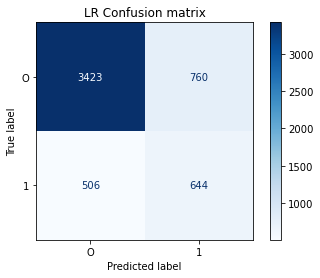

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      4183
           1       0.46      0.56      0.50      1150

    accuracy                           0.76      5333
   macro avg       0.66      0.69      0.67      5333
weighted avg       0.78      0.76      0.77      5333



/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:1168: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:1168: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:1168: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:1168: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/haoli/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:1168: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/haoli/opt/anaconda3/lib/python3.8/site-pack

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay
clf_best = clf.best_estimator_

predictions =clf_best.predict(X_test)
disp = ConfusionMatrixDisplay.from_estimator(clf_best, X_test, Y_test, display_labels=['O','1'],
                                             cmap=plt.cm.Blues,normalize=None)
disp.ax_.set_title("LR Confusion matrix")

plt.show()
print(classification_report(Y_test,predictions))

In [7]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report

clf = BernoulliNB(alpha=1.0, fit_prior=True)
clf = clf.fit(X_train, Y_train)

prediction = clf.predict(X_test)
accuracy = clf.score(X_test, Y_test)
print(accuracy)
print(confusion_matrix(Y_test, prediction))
print(classification_report(Y_test,prediction))

0.7944871554472155
[[3727  456]
 [ 640  510]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4183
           1       0.53      0.44      0.48      1150

    accuracy                           0.79      5333
   macro avg       0.69      0.67      0.68      5333
weighted avg       0.78      0.79      0.79      5333



In [55]:
clf_LR = LogisticRegression(random_state=42,C=10, penalty = 'l1',max_iter = 200, solver = 'liblinear')
clf_LR = clf_LR.fit(X_train,Y_train)
predictions_LR = clf_LR.predict(X_test)
print(clf_LR.score(X_test,Y_test))
print(confusion_matrix(Y_test, predictions_LR))
print(classification_report(Y_test,predictions_LR))

0.8126757922370148
[[4087   96]
 [ 903  247]]
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      4183
           1       0.72      0.21      0.33      1150

    accuracy                           0.81      5333
   macro avg       0.77      0.60      0.61      5333
weighted avg       0.80      0.81      0.77      5333



In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [56]:
clf_RF = RandomForestClassifier(n_estimators=200,bootstrap = True,criterion= 'entropy')
clf_RF = clf_RF.fit(X_train,Y_train)
predictions_RF = clf_RF.predict(X_test)
print(clf_RF.score(X_test,Y_test))
print(confusion_matrix(Y_test, predictions_RF))
print(classification_report(Y_test,predictions_RF))

0.8173635852240765
[[3933  250]
 [ 724  426]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4183
           1       0.63      0.37      0.47      1150

    accuracy                           0.82      5333
   macro avg       0.74      0.66      0.68      5333
weighted avg       0.80      0.82      0.80      5333



In [53]:
from sklearn.svm import SVC

clf_SVC = SVC(C=10, random_state=42,kernel = 'rbf')
clf_SVC = clf_SVC.fit(X_train,Y_train)
predictions = clf_SVC.predict(X_test)
print(clf_SVC.score(X_test,Y_test))
print(confusion_matrix(Y_test, predictions))

0.8205512844552785
[[4021  162]
 [ 795  355]]


In [54]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4183
           1       0.69      0.31      0.43      1150

    accuracy                           0.82      5333
   macro avg       0.76      0.63      0.66      5333
weighted avg       0.80      0.82      0.79      5333



In [50]:
from sklearn.ensemble import VotingClassifier
clf_LR = LogisticRegression(random_state=42,C=10, penalty = 'l1',max_iter = 200, solver = 'liblinear')
clf_RF = RandomForestClassifier(n_estimators=200,bootstrap = True,criterion= 'entropy')
clf_SVC = SVC(C=10, random_state=42,kernel = 'rbf')

clf = VotingClassifier(estimators=[('lr', clf_LR), ('rf', clf_RF), ('svm', clf_SVC)], voting='soft')
clf = clf.fit(X_train,Y_train)

In [49]:
predictions = clf.predict(X_test)
print(clf.score(X_test,Y_test))
print(confusion_matrix(Y_test, predictions))

0.8209263078942434
[[4038  145]
 [ 810  340]]


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(10, input_dim = len(X_train[0, :]), activation = 'relu'))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 77        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 8         
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [7]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [11]:
from tensorflow import keras
opt = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt, loss='mean_absolute_error', metrics=['acc',f1_m,precision_m, recall_m])
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size = 10)
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, Y_test, verbose=0)

Epoch 1/10
1707/1707 [==============================] - 3s 1ms/step - loss: 0.2342 - acc: 0.7910 - f1_m: 0.3209 - precision_m: 0.4273 - recall_m: 0.3022 - val_loss: 0.1955 - val_acc: 0.8071 - val_f1_m: 0.3450 - val_precision_m: 0.4764 - val_recall_m: 0.3036
Epoch 2/10
1707/1707 [==============================] - 2s 1ms/step - loss: 0.1895 - acc: 0.8128 - f1_m: 0.3365 - precision_m: 0.4467 - recall_m: 0.3004 - val_loss: 0.1903 - val_acc: 0.8125 - val_f1_m: 0.3381 - val_precision_m: 0.4799 - val_recall_m: 0.2886
Epoch 3/10
1707/1707 [==============================] - 2s 1ms/step - loss: 0.1856 - acc: 0.8156 - f1_m: 0.3411 - precision_m: 0.4593 - recall_m: 0.3031 - val_loss: 0.1873 - val_acc: 0.8137 - val_f1_m: 0.3517 - val_precision_m: 0.4960 - val_recall_m: 0.3017
Epoch 4/10
1707/1707 [==============================] - 2s 1ms/step - loss: 0.1844 - acc: 0.8156 - f1_m: 0.3428 - precision_m: 0.4601 - recall_m: 0.3062 - val_loss: 0.1874 - val_acc: 0.8137 - val_f1_m: 0.3548 - val_precision_m

In [12]:
loss, accuracy, f1_score, precision, recall

(0.17555484175682068,
 0.8250515460968018,
 0.4487931430339813,
 0.6808383464813232,
 0.3604806363582611)